In [1]:
#| echo: false
%load_ext autoreload
%autoreload 2

# Sktime models
> Use any sktime forecaster for forecasting

statsforecast supports [sktime](https://github.com/sktime/sktime) forecasters through the `statsforecast.models.SktimeModel` wrapper. You can use Theta, ARIMA, ETS, and other sktime algorithms alongside native statsforecast models, with one model fit per series.

Install the optional dependency: `pip install statsforecast[sktime]` or `pip install sktime`.

## Data setup

Use the same data format as other statsforecast models: a dataframe with `unique_id`, `ds`, and `y`. Exogenous variables are optional and only needed if your sktime forecaster supports them.

In [2]:
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.naive import NaiveForecaster
from utilsforecast.plotting import plot_series

from statsforecast import StatsForecast
from statsforecast.models import SktimeModel
from statsforecast.utils import ConformalIntervals

import pandas as pd
import numpy as np

In [3]:
np.random.seed(42)
n_series = 3
len_series = 72
dates = pd.date_range('2018-01-01', periods=len_series, freq='MS')
data = []
for i in range(n_series):
    y = 100 + np.cumsum(np.random.randn(len_series) * 2) + 10 * np.sin(np.arange(len_series) * 2 * np.pi / 12)
    data.append(pd.DataFrame({'unique_id': str(i), 'ds': dates, 'y': y}))
train = pd.concat(data, ignore_index=True)
train.head()

,unique_id,ds,y
0,0,2018-01-01,100.993428
1,0,2018-02-01,105.716900
2,0,2018-03-01,110.672531
3,0,2018-04-01,115.058336
4,0,2018-05-01,113.250284


## Forecasting

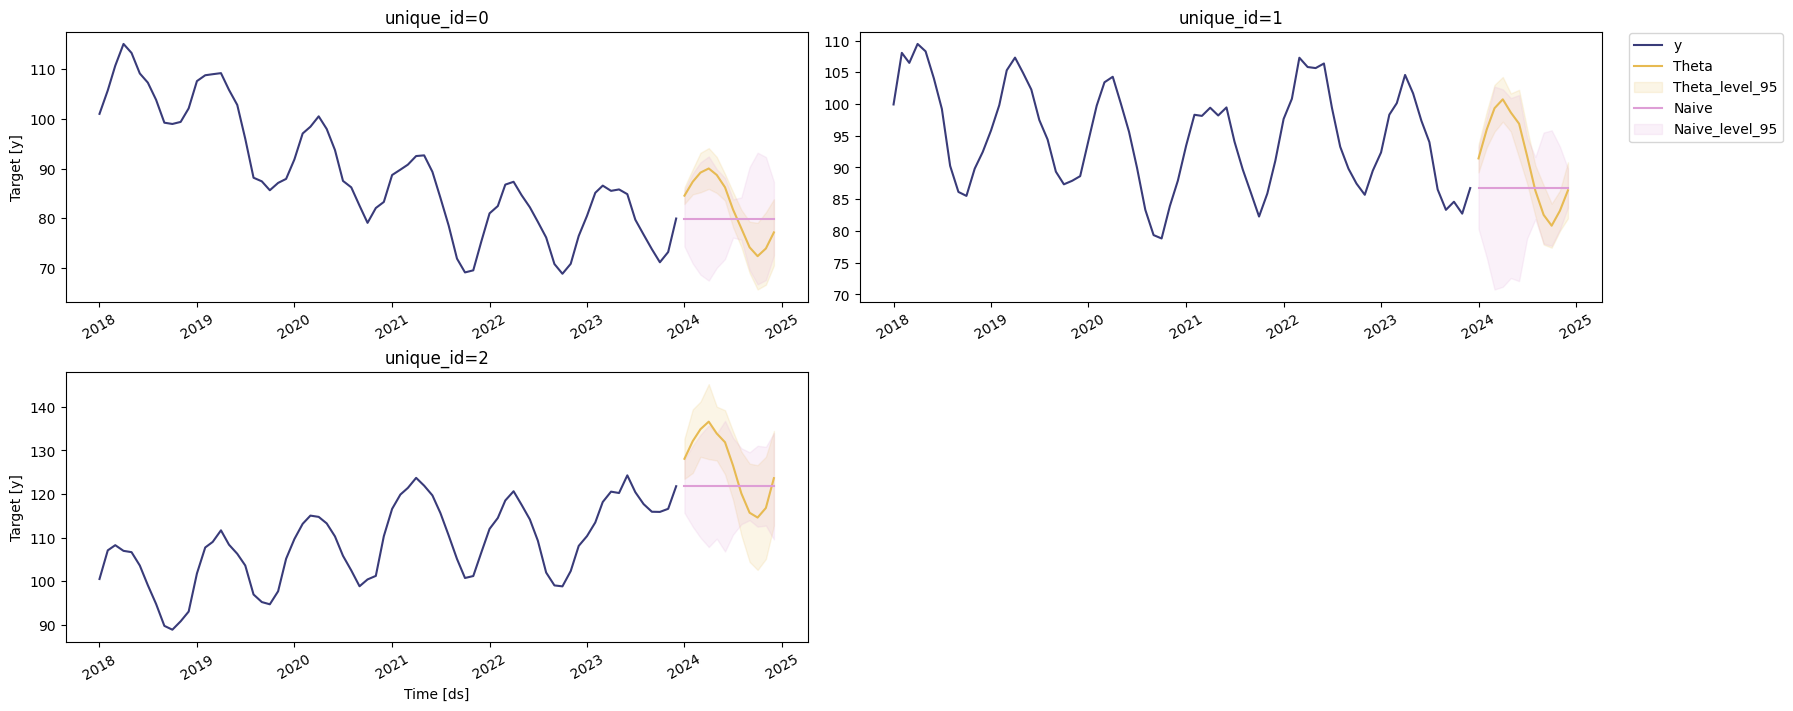

In [4]:
horizon = 12
sf = StatsForecast(
    models=[
        SktimeModel(ThetaForecaster(sp=12), alias='Theta'),
        SktimeModel(NaiveForecaster(), alias='Naive'),
    ],
    freq='MS',
)
preds = sf.forecast(
    df=train,
    h=horizon,
    prediction_intervals=ConformalIntervals(n_windows=4, h=horizon),
    level=[95],
)
plot_series(train, preds, level=[95], palette='tab20b', max_ids=3)